In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS, OptimizedLatentFactorALS
from rekomenda.utils import load_data

In [ ]:
train, test  = load_data(filepath='../ml-latest-small/ratings.csv', split_ratio=0.8)

In [4]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [5]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [9]:
train_als = LatentFactorALS(lambda_reg=0.01, n_factors=2)

In [10]:
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=20)

Iteration 1/20 - RMSE: 0.7261, NLL: 21389.5983
Iteration 2/20 - RMSE: 0.6984, NLL: 19810.3434
Iteration 3/20 - RMSE: 0.6894, NLL: 19307.4331
Iteration 4/20 - RMSE: 0.6839, NLL: 19010.8024
Iteration 5/20 - RMSE: 0.6800, NLL: 18801.7191
Iteration 6/20 - RMSE: 0.6774, NLL: 18660.0081
Iteration 7/20 - RMSE: 0.6754, NLL: 18558.7760
Iteration 8/20 - RMSE: 0.6739, NLL: 18480.2550
Iteration 9/20 - RMSE: 0.6727, NLL: 18417.3141
Iteration 10/20 - RMSE: 0.6716, NLL: 18358.9800
Iteration 11/20 - RMSE: 0.6708, NLL: 18315.0375
Iteration 12/20 - RMSE: 0.6700, NLL: 18277.9755
Iteration 13/20 - RMSE: 0.6694, NLL: 18247.2552
Iteration 14/20 - RMSE: 0.6689, NLL: 18220.7906
Iteration 15/20 - RMSE: 0.6685, NLL: 18196.8593
Iteration 16/20 - RMSE: 0.6681, NLL: 18173.7205
Iteration 17/20 - RMSE: 0.6676, NLL: 18149.2080
Iteration 18/20 - RMSE: 0.6672, NLL: 18127.7384
Iteration 19/20 - RMSE: 0.6668, NLL: 18109.6930
Iteration 20/20 - RMSE: 0.6665, NLL: 18093.8364


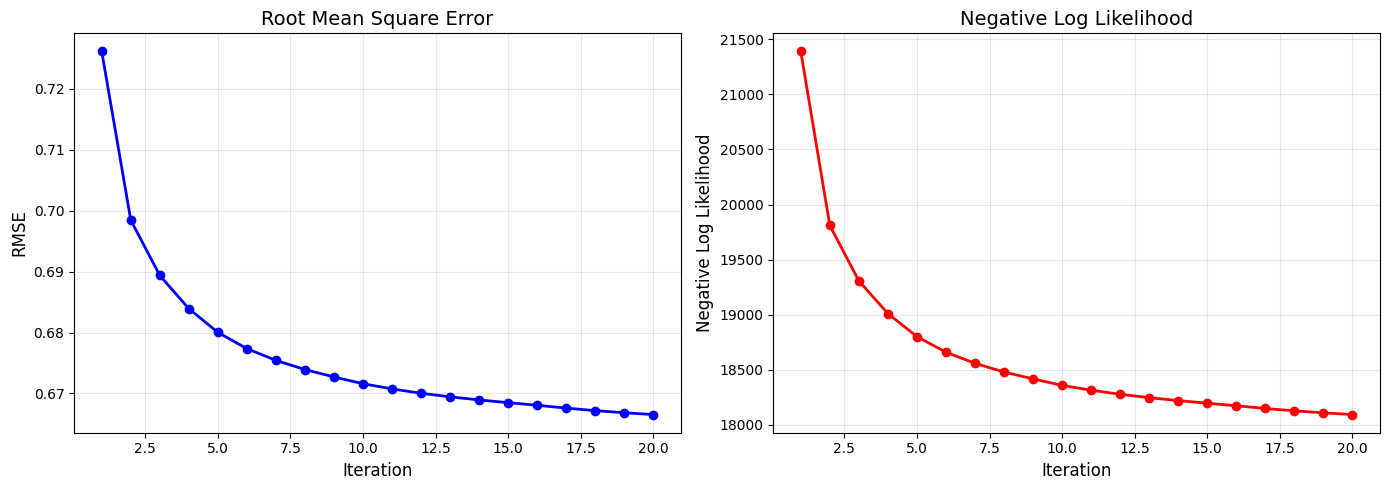

In [11]:
train_als.plot_metrics(output='pics/als-bias-with-latent-train-100k.pdf')

In [12]:
test_als = LatentFactorALS(lambda_reg=0.05, n_factors=2)

In [13]:
test_als.fit(csr_matrix=test_csr, csc_matrix=test_csc,n_iterations=20)

Iteration 1/20 - RMSE: 0.5801, NLL: 3605.4635
Iteration 2/20 - RMSE: 0.5349, NLL: 3096.0315
Iteration 3/20 - RMSE: 0.5175, NLL: 2912.1384
Iteration 4/20 - RMSE: 0.5079, NLL: 2813.8239
Iteration 5/20 - RMSE: 0.5012, NLL: 2747.4174
Iteration 6/20 - RMSE: 0.4965, NLL: 2700.6232
Iteration 7/20 - RMSE: 0.4929, NLL: 2665.2843
Iteration 8/20 - RMSE: 0.4899, NLL: 2636.4362
Iteration 9/20 - RMSE: 0.4872, NLL: 2610.6822
Iteration 10/20 - RMSE: 0.4850, NLL: 2589.0575
Iteration 11/20 - RMSE: 0.4829, NLL: 2570.1113
Iteration 12/20 - RMSE: 0.4811, NLL: 2553.4436
Iteration 13/20 - RMSE: 0.4797, NLL: 2540.5045
Iteration 14/20 - RMSE: 0.4785, NLL: 2529.7227
Iteration 15/20 - RMSE: 0.4774, NLL: 2520.2046
Iteration 16/20 - RMSE: 0.4764, NLL: 2511.1035
Iteration 17/20 - RMSE: 0.4755, NLL: 2502.8876
Iteration 18/20 - RMSE: 0.4747, NLL: 2495.6809
Iteration 19/20 - RMSE: 0.4739, NLL: 2489.3248
Iteration 20/20 - RMSE: 0.4733, NLL: 2483.5300


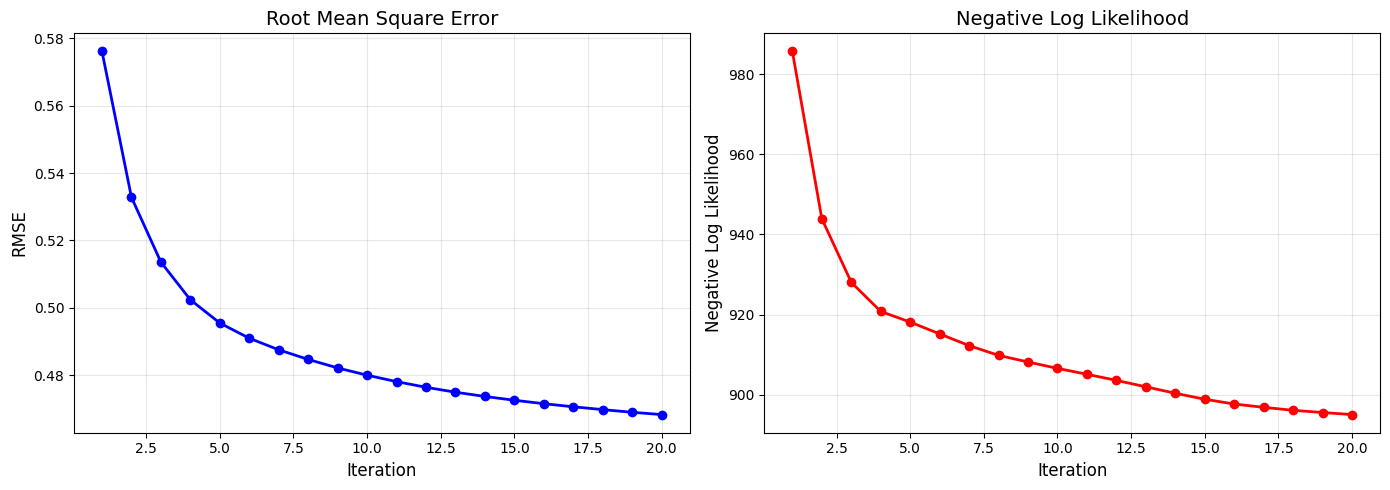

In [35]:
test_als.plot_metrics(output='pics/als-bias-with-latent-test.pdf')